**Завдання**

Виконати 2D лінійну фільтрацію зображення з різними значеннями ядра. Провести
порівняльний аналіз

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [46]:
im=cv2.imread('/content/plain.jpeg', cv2.IMREAD_GRAYSCALE)

In [70]:
# функція, що здійснює 2d конвулюцію
def conv(image, kernel):
  h_k, w_k = np.shape(kernel)
  image = np.pad(image, 1, mode='symmetric')
  shape = image.shape
  h_in, w_in = image.shape

  output = np.zeros((h_in, w_in))

  for i in range(h_in-h_k):
      for j in range(w_in-w_k):
          h_start, w_start = i, j
          h_end, w_end = h_start + f, w_start + f
          output[i, j] = np.sum(
              image[h_start:h_end, w_start:w_end] *
              kernel, axis=(0,1))

  output = (output - output.min(axis=0)) / (output.max(axis=0) - output.min(axis=0))
  return output * 255


Для порівняння обрано наступні ядра:

In [78]:
ker=[[-1,-2,-1],[0,0,0],[-1,-2,-1]]
ker2=[[1,1,1], [0,0,0], [-1,-1,-1]]
ker3=[[1,0,-1], [2,0,-2], [1,0,-1]]

На зображеннях нище видно, що перше ядро інвертує кольори, друге більше виділяє більше горизонтальні лінії, третє вертикальні.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


Text(0.5, 1.0, 'After kernel 3')

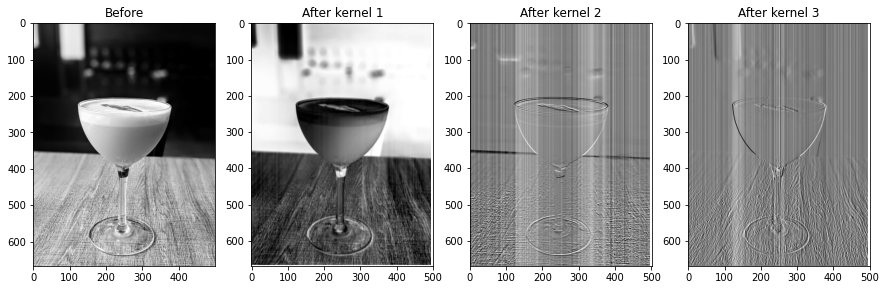

In [79]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1, 4, 1)
imgplot = plt.imshow(im, cmap='gray', vmin=0, vmax=255)
ax.set_title('Before')

ax = fig.add_subplot(1, 4, 2)
imgplot = plt.imshow(conv(im, ker), cmap='gray', vmin=0, vmax=255)
ax.set_title('After kernel 1')

ax = fig.add_subplot(1, 4, 3)
imgplot = plt.imshow(conv(im, ker2), cmap='gray', vmin=0, vmax=255)
ax.set_title('After kernel 2')

ax = fig.add_subplot(1, 4, 4)
imgplot = plt.imshow(conv(im, ker3), cmap='gray', vmin=0, vmax=255)
ax.set_title('After kernel 3')
